# **Setup**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

# **Data**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rwyld/Data-Science-Models/main/Modelos/Regresion%20Logistica/RRHH%20CSV.csv')
display(data.head(15))

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Sexo,Estado.Civil,Departamento,Posicion,Desempeño
0,0,30.0,28.50,4167.066667,3317,1,Female,2,Admin Offices,Accountant I,Fully Meets
1,0,34.0,23.00,6962.466667,1420,17,Male,1,Admin Offices,Accountant I,Fully Meets
2,0,31.0,29.00,4330.333333,1154,3,Male,4,Admin Offices,Accountant I,Fully Meets
3,0,32.0,21.50,4332.733333,58,15,Female,2,Admin Offices,Administrative Assistant,N/A- too early to review
4,0,30.0,16.56,3388.333333,940,2,Female,4,Admin Offices,Administrative Assistant,N/A- too early to review
5,1,30.0,20.50,3837.866667,730,15,Female,2,Admin Offices,Administrative Assistant,Fully Meets
6,0,33.0,55.00,6377.333333,691,19,Male,2,Admin Offices,Shared Services Manager,Fully Meets
7,1,33.0,55.00,3957.666667,1636,19,Male,2,Admin Offices,Shared Services Manager,Fully Meets
8,0,31.0,34.95,3189.133333,1014,4,Female,2,Admin Offices,Sr. Accountant,90-day meets
9,0,39.0,34.95,3345.200000,3247,16,Female,2,Admin Offices,Sr. Accountant,Fully Meets


# **Analisis Exploratorios**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Estado           310 non-null    int64  
 1   Edad             310 non-null    float64
 2   Ratio.Pago       310 non-null    float64
 3   Salario          310 non-null    float64
 4   Dias.trabajados  310 non-null    int64  
 5   Ausencias        310 non-null    int64  
 6   Sexo             310 non-null    object 
 7   Estado.Civil     310 non-null    int64  
 8   Departamento     310 non-null    object 
 9   Posicion         310 non-null    object 
 10  Desempeño        310 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 26.8+ KB


In [ ]:
data.isnull().sum()

Estado             0
Edad               0
Ratio.Pago         0
Salario            0
Dias.trabajados    0
Ausencias          0
Sexo               0
Estado.Civil       0
Departamento       0
Posicion           0
Desempeño          0
dtype: int64

In [ ]:
infoData = data
infoData = infoData.drop('Estado.Civil', axis = 1)
infoData.describe()

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.409677,38.867742,31.284806,4606.534839,1296.080645,10.264516
std,0.492569,8.922459,15.383615,1677.350176,769.491382,5.843235
min,0.000000,25.000000,14.000000,3004.600000,2.000000,1.000000
25%,0.000000,32.000000,20.000000,3707.033333,766.250000,5.000000
50%,0.000000,37.000000,24.000000,4190.666667,1238.000000,10.000000
75%,1.000000,44.000000,45.315000,4804.733333,1732.750000,15.000000
max,1.000000,67.000000,80.000000,16666.666667,4339.000000,20.000000


Se observan algunas posibles incongruensias en la variable de Salario 

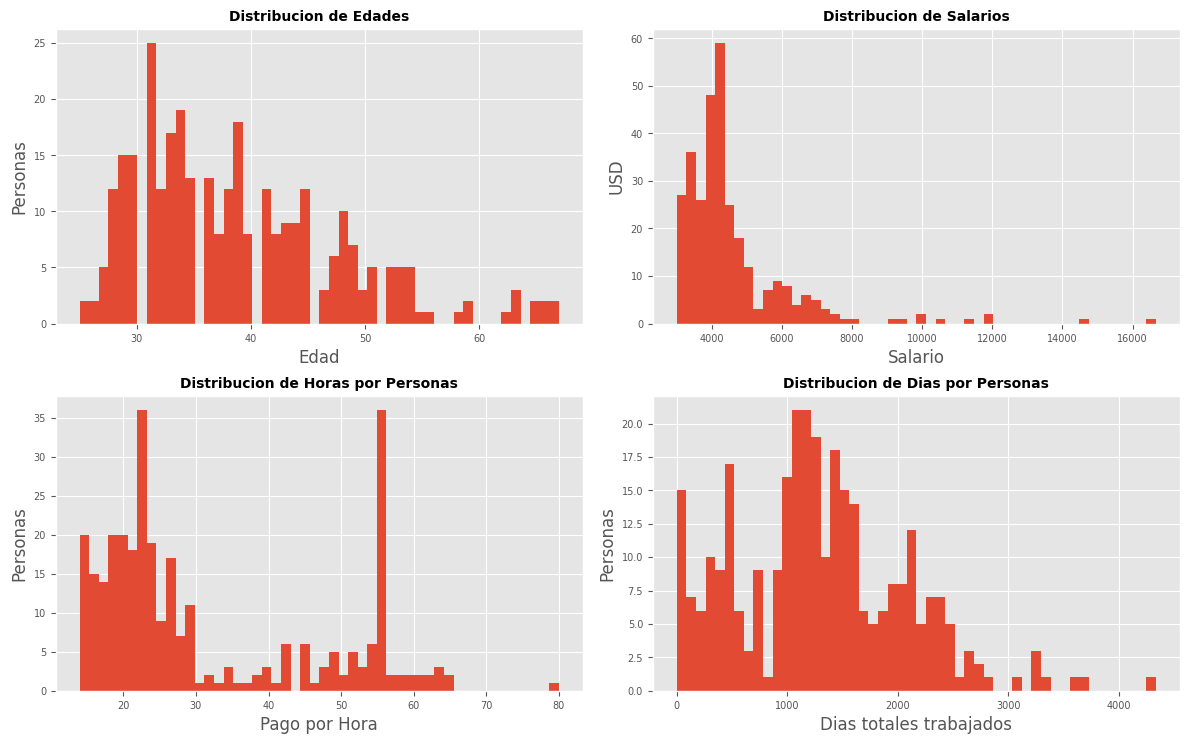

In [ ]:
fig, axe = plt.subplots(2, 2, figsize=(12,8))

axe[0, 0].hist(data['Edad'], bins = 50)
axe[0, 1].hist(data['Salario'], bins = 50)
axe[1, 0].hist(data['Ratio.Pago'], bins = 50)
axe[1, 1].hist(data['Dias.trabajados'], bins = 50)

axe[0, 0].set_xlabel('Edad')
axe[0, 0].set_ylabel('Personas')
axe[0, 0].set_title('Distribucion de Edades', fontsize = 10, fontweight = "bold")
axe[0, 0].tick_params(labelsize = 7)

axe[0, 1].set_xlabel('Salario')
axe[0, 1].set_ylabel('USD')
axe[0, 1].set_title('Distribucion de Salarios', fontsize = 10, fontweight = "bold")
axe[0, 1].tick_params(labelsize = 7)

axe[1, 0].set_xlabel('Pago por Hora')
axe[1, 0].set_ylabel('Personas')
axe[1, 0].set_title('Distribucion de Horas por Personas', fontsize = 10, fontweight = "bold")
axe[1, 0].tick_params(labelsize = 7)

axe[1, 1].set_xlabel('Dias totales trabajados')
axe[1, 1].set_ylabel('Personas')
axe[1, 1].set_title('Distribucion de Dias por Personas', fontsize = 10, fontweight = "bold")
axe[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Con estos graficos realizados, podemos observar que existen algunos salarios que superan los 8000 USD, lo que es sospechoso, por lo tanto hay que identificar primero si estan correctos o no.

In [ ]:
dataSalarios = data['Salario'].sort_values(ascending = False)

display(dataSalarios.head(5))
print('')
display(dataSalarios.tail(5))

150    16666.666667
308    14696.666667
131    12000.000000
96     11866.666667
55     11366.666667
Name: Salario, dtype: float64

216    3066.533333
152    3028.866667
176    3026.333333
231    3007.666667
140    3004.600000
Name: Salario, dtype: float64

Como el sueldo minimo de la empresa esta entre los 3000+ USD, los sueldos sobre 8000 USD deberian ser omitidos, ya que son posibles candidatos de ser datos incongruentes. Ademas revisando los datos de la variable Edad, se observan algunos datos incongruentes dentro de la tabla.

Por lo tanto, los datos incongruentes seran omitidos, al igual que las variables Estado Civil, Posicion, Desempeño y Departamento 

# **Construyendo nuevo DataFrame con las variables continuas**

In [ ]:
newData = data.loc[:, ['Estado', 'Edad',	'Ratio.Pago',  'Salario',	'Dias.trabajados',	'Ausencias']]

#Eliminando Edades incongruentes
newData = newData.drop(index = newData[newData['Edad']%1 != 0].index)

#Eliminando Salarios muy altos
newData = newData.drop(index = newData[newData['Salario'] > 8000].index)

newData.head(5)

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias
0,0,30.0,28.50,4167.066667,3317,1
1,0,34.0,23.00,6962.466667,1420,17
2,0,31.0,29.00,4330.333333,1154,3
3,0,32.0,21.50,4332.733333,58,15
4,0,30.0,16.56,3388.333333,940,2


# **Modelo Regresion Logistica**

In [ ]:
X = newData.iloc[:,newData.columns != 'Estado'] 
y = newData.Estado

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.75,
                                        random_state = 2023,
                                        shuffle      = True
                                    )

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.509974
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Estado   No. Observations:                  210
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 May 2023   Pseudo R-squ.:                  0.2482
Time:                        22:47:59   Log-Likelihood:                -107.09
converged:                       True   LL-Null:                       -142.46
Covariance Type:            nonrobust   LLR p-value:                 7.221e-14
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.6859      1.088      1.549      0.121      -0.447       3.819
Edad          

# **Metricas**

In [ ]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, clasificacion)
cnf_matrix

array([[33,  9],
       [ 7, 22]])

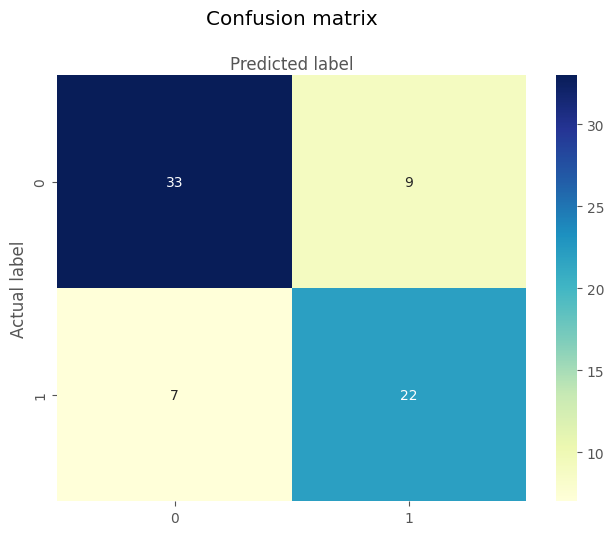

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, clasificacion)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo el Puntaje F1 del modelo
puntajef1 = f1_score(y_test, clasificacion)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, clasificacion)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la precisión del modelo
precision = precision_score(
            y_true = y_test, 
            y_pred = clasificacion)
print('Precisión del modelo:')
print(precision)

Sensibilidad del modelo:
0.7586206896551724
Puntaje F1 del modelo:
0.7333333333333333
Exactitud del modelo:
0.7746478873239436
Precisión del modelo:
0.7096774193548387


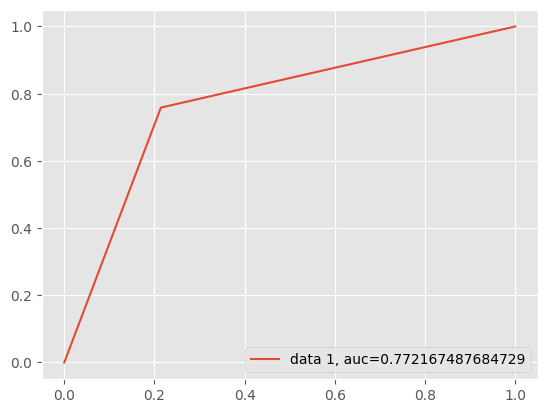

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  clasificacion)
auc = metrics.roc_auc_score(y_test, clasificacion)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, clasificacion)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Curva ROC - AUC del modelo:
0.772167487684729


# **Interpretacion**

Con lo observado en el modelo, podemos concluir que las variables Salario y Ausencias no son significativos y que no se puede afirmar que tienen relacion con el Estado del empleado. Sin embargo, las variables Edad, Ratio y Dias, son significativos.

De acuerdo a las metricas obtenidas del modelo, este modelo posee una Exactitud del 77% y una precision del 70%. En cuanto al valor de AUC es de 0.77, el cual es cercano a 1 y que tiene un buen desempeño para distinguir los casos positivos y negativos.

#C**onstruyendo nuevo DataFrame con las variables categoricas**

<Axes: xlabel='Sexo', ylabel='count'>

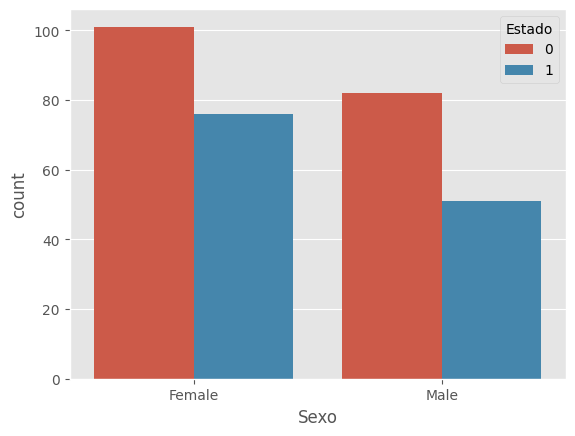

In [ ]:
sns.countplot(x='Sexo', hue='Estado', data=data)

<Axes: xlabel='Estado.Civil', ylabel='count'>

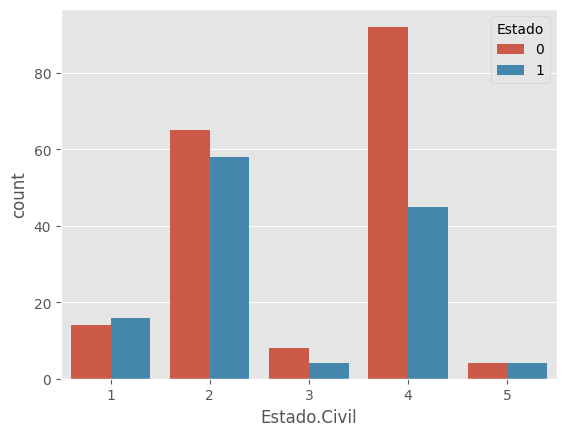

In [ ]:
sns.countplot(x='Estado.Civil', hue='Estado', data=data)


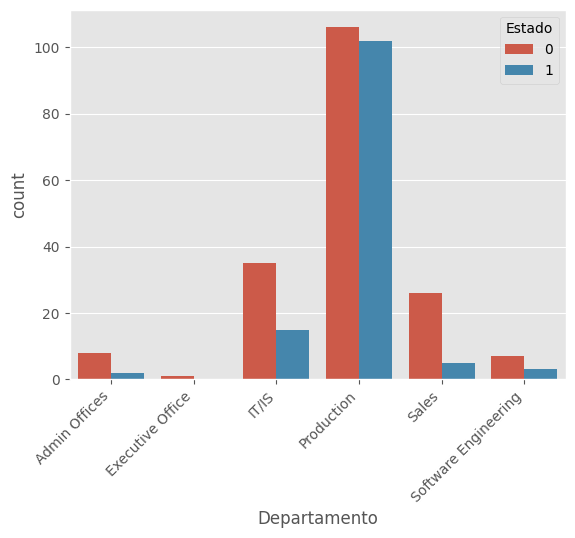

In [ ]:
sns.countplot(x='Departamento', hue='Estado', data=data)
plt.xticks(rotation=45, ha='right')
plt.show()


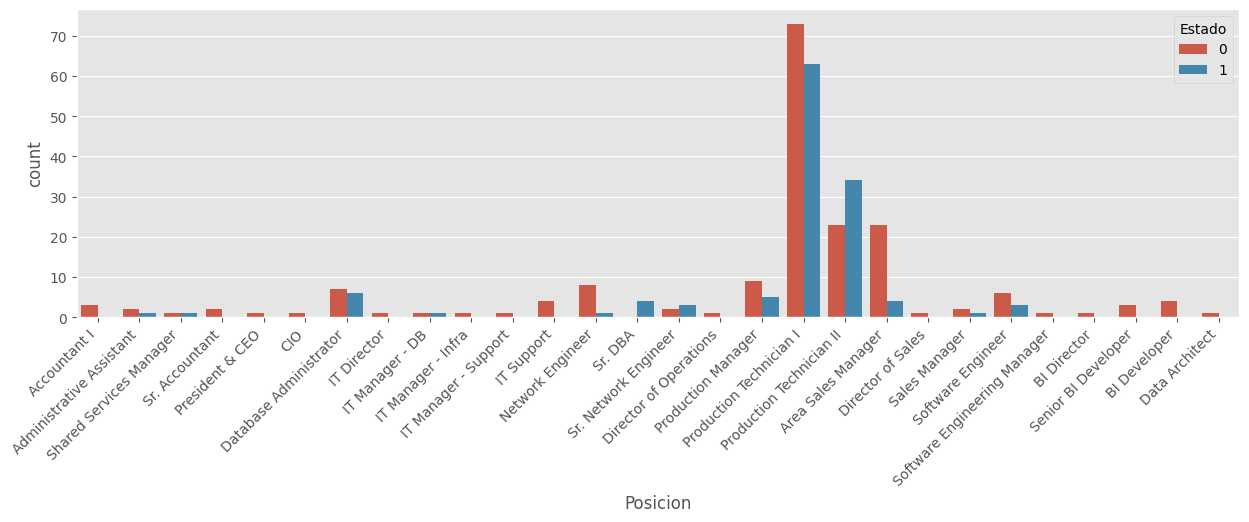

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(x='Posicion', hue='Estado', data=data)
plt.xticks(rotation=45, ha='right')

plt.show()


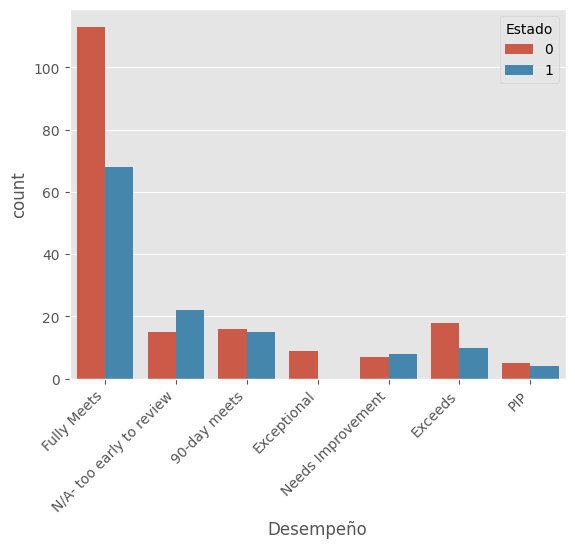

In [ ]:
sns.countplot(x='Desempeño', hue='Estado', data=data)
plt.xticks(rotation=45, ha='right')
plt.show()

# **Modelo Regresion Logistica para variables Categoricas**

In [ ]:
dataCateg = pd.get_dummies(data, columns=['Sexo', 'Estado.Civil', 'Departamento', 'Desempeño'])
A = dataCateg.drop(['Estado','Posicion'], axis=1)
b = dataCateg['Estado']

A = A.astype(int)

In [ ]:
#Train Test split 75/25
A_train, A_test, b_train, b_test = train_test_split(
                                        A,
                                        b,
                                        train_size   = 0.75,
                                        random_state = 2023,
                                        shuffle      = True
                                    )

In [ ]:
modeloC = sm.Logit(b_train, A_train)
modeloC = modeloC.fit()
print(modeloC.summary())

         Current function value: 0.426715
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Estado   No. Observations:                  232
Model:                          Logit   Df Residuals:                      210
Method:                           MLE   Df Model:                           21
Date:                Thu, 04 May 2023   Pseudo R-squ.:                  0.3735
Time:                        22:48:04   Log-Likelihood:                -98.998
converged:                      False   LL-Null:                       -158.01
Covariance Type:            nonrobust   LLR p-value:                 1.649e-15
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Edad                                   0.0662      0.023      2.914      0.004       0.022      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Segun los datos obtenidos con el modelo para observar si las categorias tienen relacion con el estado del empleado, se puede concluir que no son significativas para determinar el estado, puesto que poseen un p value de 1. 